In [139]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA


group.png


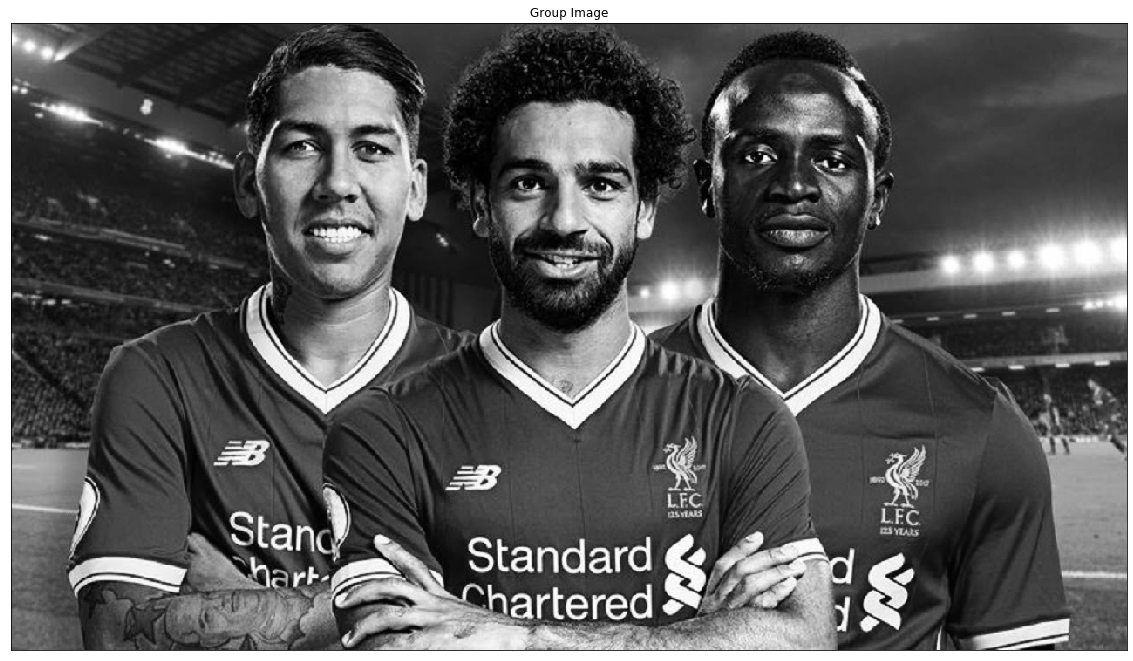

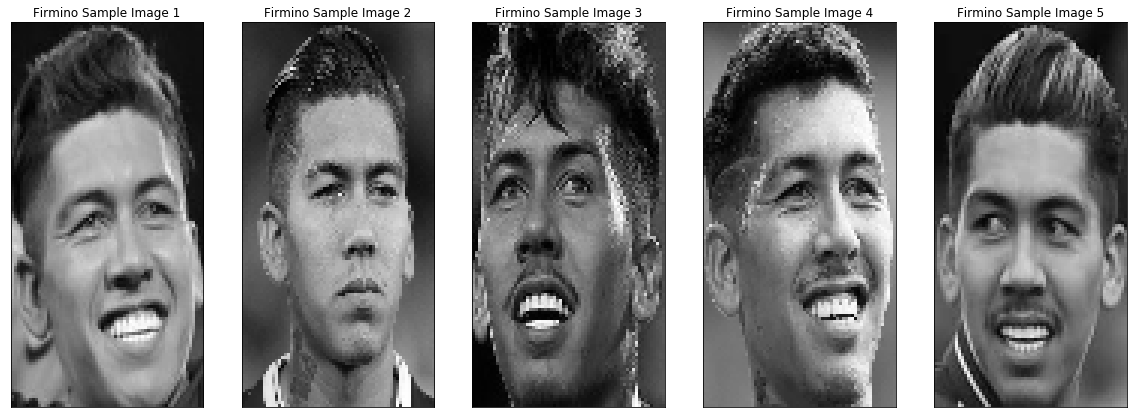

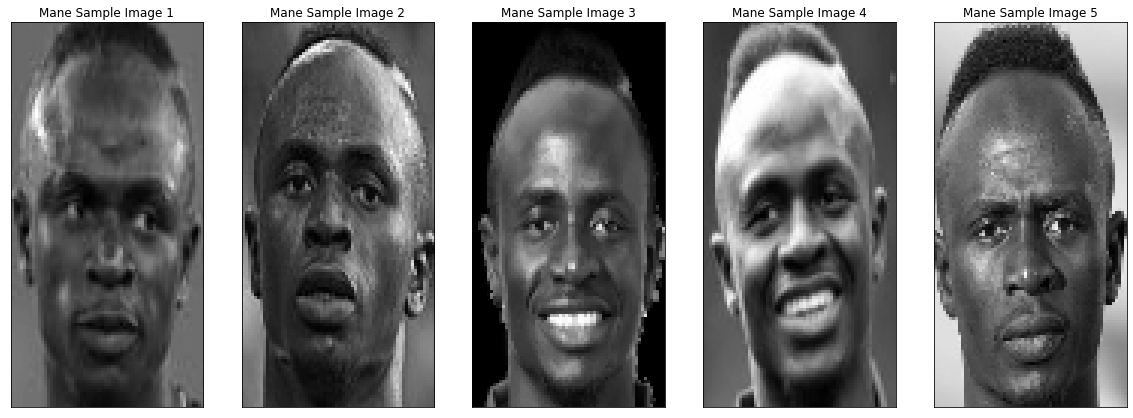

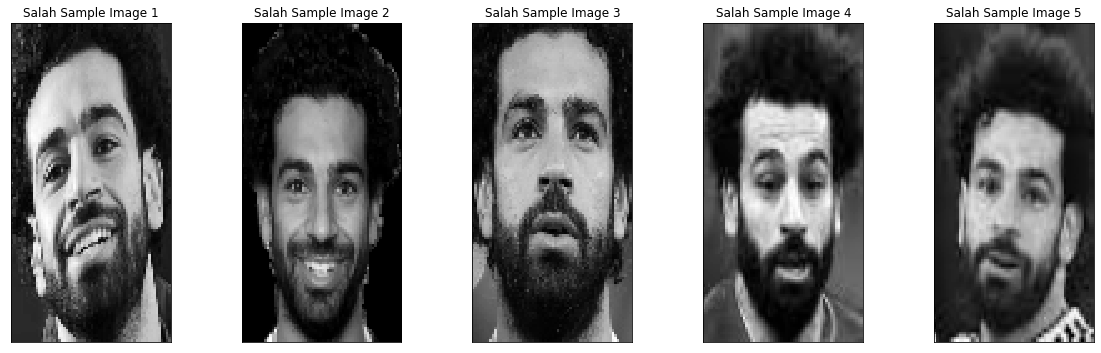

In [140]:
#Setting image_read variables.
categories = {
    0 : "group",
    1 : "firmino",
    2 : "mane",
    3 : "salah",
}
folder = "./data/"

imgs = []       
imgsLabel = []

train_path = './data/group/'
train_classes = os.listdir(train_path)[1]
print(train_classes)
#Reading images
for idx in range(len(categories)):
    imgType = categories[idx] + "/"
    imgPath = os.listdir(folder+imgType)
    
    #Read images in subfolder
    if(idx == 0):
        imgFileName = os.listdir(folder+imgType)[1]
       # print(imgFileName)
        img = cv2.imread(folder+imgType+imgFileName)
        group = img
        groupRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        groupGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        groupGrayUnsigned = groupGray.copy()
        group = group / 255
        groupRGB = groupRGB /255
        groupGray = groupGray/255
        continue
    
    for imgFileName in os.listdir(folder+imgType):
        #print(imgFileName)
        if (imgFileName==".DS_Store"):
            continue
        img = cv2.imread(folder+imgType+imgFileName)
       
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(64,128))
        img = img/255
        imgsLabel.append(idx)
        imgs.append(img)

imgsLabel = np.asarray(imgsLabel)
#Displaying images
plt.figure(figsize=(20,20))
plt.imshow(groupGray,cmap = "gray")
plt.title("Group Image"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(151)
plt.imshow(imgs[0],cmap = "gray")
plt.title("Firmino Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(152)
plt.imshow(imgs[1],cmap = "gray")
plt.title("Firmino Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(153)
plt.imshow(imgs[2],cmap = "gray")
plt.title("Firmino Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(154)
plt.imshow(imgs[3],cmap = "gray")
plt.title("Firmino Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(155)
plt.imshow(imgs[4],cmap = "gray")
plt.title("Firmino Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(251)
plt.imshow(imgs[10],cmap = "gray")
plt.title("Mane Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(252)
plt.imshow(imgs[11],cmap = "gray")
plt.title("Mane Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(253)
plt.imshow(imgs[12],cmap = "gray")
plt.title("Mane Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(254)
plt.imshow(imgs[13],cmap = "gray")
plt.title("Mane Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(255)
plt.imshow(imgs[14],cmap = "gray")
plt.title("Mane Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(351)
plt.imshow(imgs[20],cmap = "gray")
plt.title("Salah Sample Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(352)
plt.imshow(imgs[21],cmap = "gray")
plt.title("Salah Sample Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(353)
plt.imshow(imgs[22],cmap = "gray")
plt.title("Salah Sample Image 3"), plt.xticks([]), plt.yticks([])
plt.subplot(354)
plt.imshow(imgs[23],cmap = "gray")
plt.title("Salah Sample Image 4"), plt.xticks([]), plt.yticks([])
plt.subplot(355)
plt.imshow(imgs[24],cmap = "gray")
plt.title("Salah Sample Image 5"), plt.xticks([]), plt.yticks([])
plt.show()

Describe how you selected the images with respect to the conditions of
the detection/recognition methods.

First, I convert all images to grayscale. This will reduce the dimensionality of the data to only two dimensions. Also, I resize all the training images to one single size in order to speed up the computation time. 

When selecting the training images, I decided to select portraits that have a more uniform lighting. I avoided portraits with strong lighting and shadows, which would have obscured certain features. 

Furthermore, I attempted to keep the orientation of the portraits to the same and their facial expression be similar. This can make sure that the features in the group image from certain angles appear as similar as possible in the training images. 

Part 2: Produce and eigenface representation for your training data through PCA.

In [141]:
#implement PCA
def pca(dataMat, topNfeat):
    Data=[]
    Data_adj=[]
    LowDimensionMat=[]
    DataAdjusts=[]
    coV=0
    redEigVects=[]
    aatEigVects=[]
    
    for data in dataMat:
        data=np.matrix(data)
        Data.append(data)
        
    meanVals=np.mean(Data,axis=0)
    
    #step 4
    #subtract the mean value from data
    for data in Data:
        DataAdjust=data-meanVals
        DataAdjusts.append(DataAdjust)
        
        DataAdjust_T=np.transpose(DataAdjust)
        coV+=np.dot(DataAdjust_T,DataAdjust)
    covMat=coV/len(Data)
    
    Data_adj=np.array(DataAdjusts)
    
    
    #step6
    #calculate the eigenvalue and eigenvector
    eigVals,eigVects=np.linalg.eig(covMat)
    #calculate the covariance matrix
    #sort the eigenvalues
    eigValInd=eigVals.argsort()[::-1][:topNfeat]
    #eigValInd = eigValInd[:-(topNfeat+1):-1]
    
    #The corresponding eigenvectors
    for i in range(len(eigValInd)):
        redEigVect = eigVects[:,eigValInd[i]]
        redEigVects.append(redEigVect)
    
    
    for eigV in redEigVects:
        aatEig=np.dot(Data_adj,eigV)
        aatEig=np.linalg.norm(aatEig)
        aatEigVects.append(aatEig)
        
    
    #convert the values to the low dimensional space
    for i in range (len(aatEigVects)):
        lowDimensionMat = np.dot(DataAdjusts[i],aatEigVects[i])
        LowDimensionMat.append(lowDimensionMat)
        
    return meanVals, LowDimensionMat

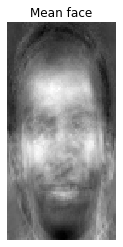

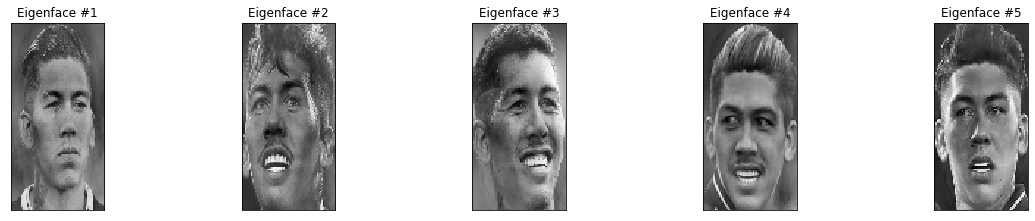

In [142]:
meanVals,LowDimensionMat=pca(imgs,12)

plt.imshow(meanVals,'gray')
plt.title('Mean face'),plt.axis('off')
plt.show()


plt.figure(figsize=(20,20))
for i in range (1,6):
    plt.subplot(5,5,i),plt.imshow(LowDimensionMat[i],'gray')
    
    plt.title("Eigenface #" + str(i))
    plt.xticks([]),plt.yticks([])

plt.show()

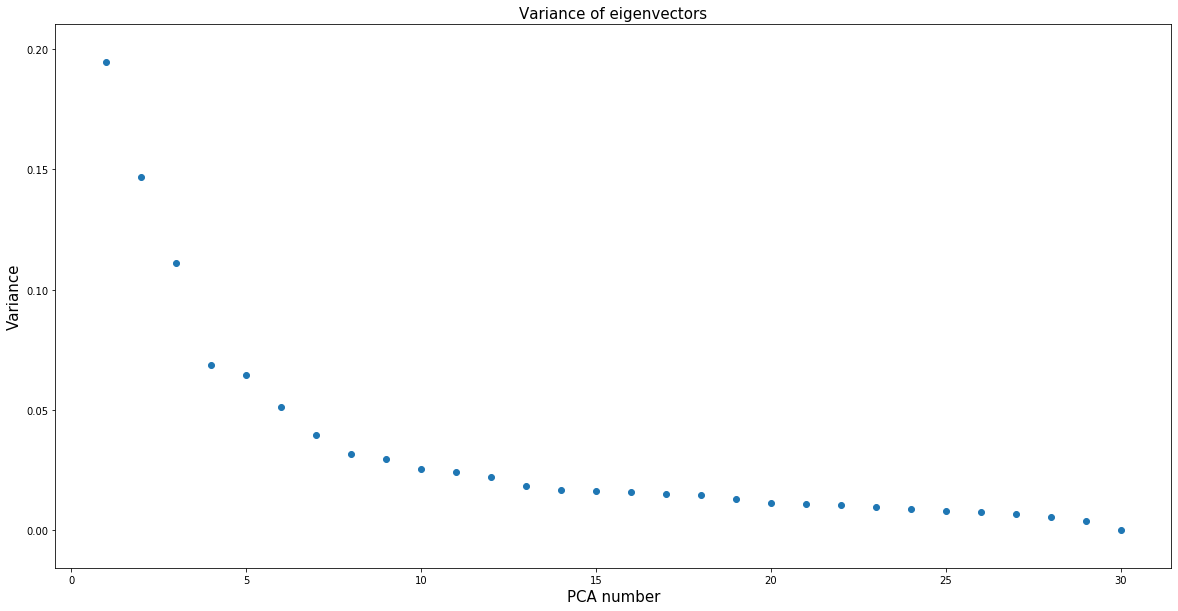

In [143]:
B=imgs.copy()
x_train = np.float64(B)
y_train = np.array(imgsLabel)

x_train = x_train.reshape(x_train.shape[0], -1)

# Compute PCA over range of components
pca_comp = range(1, x_train.shape[0]+1)
variance_ratio = []
for comp in pca_comp:
    pca = PCA(n_components=comp)

    # Compute PCA
    x_train_pca = pca.fit_transform(x_train)
    
    # Get explained variance ratio
    variance_ratio.append(pca.explained_variance_ratio_[-1])

# Plot PCA variance ratio vs number of PCA components
plt.figure(figsize=(20,10))
plt.scatter(pca_comp, variance_ratio)
plt.title('Variance of eigenvectors', fontsize=15)
plt.xlabel('PCA number', fontsize=15)
plt.ylabel('Variance', fontsize=15)

plt.show()

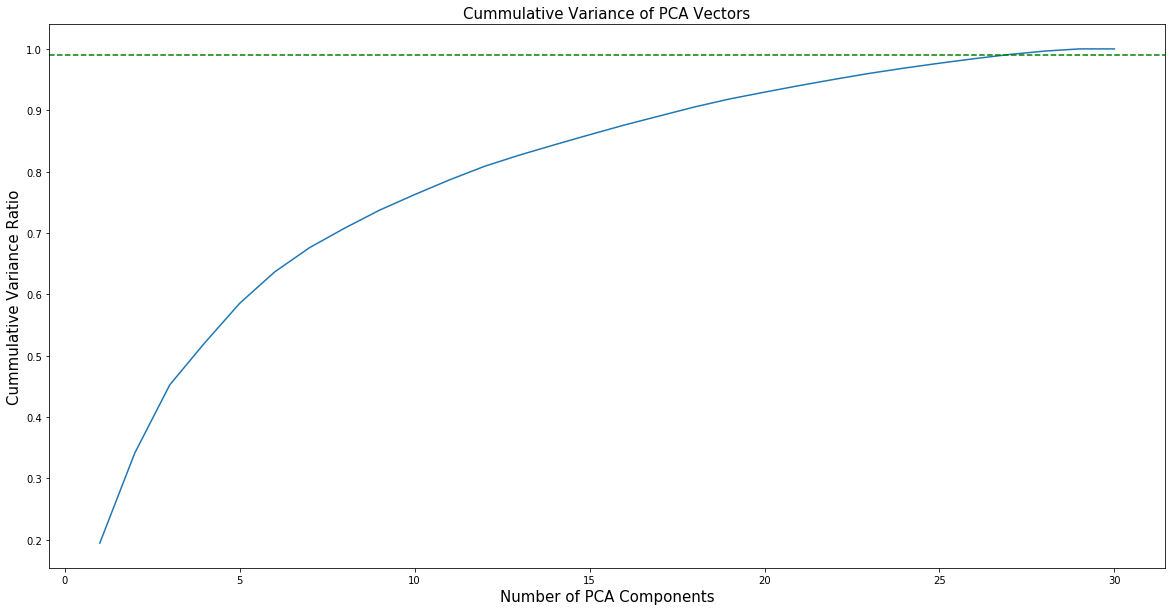

In [144]:
plt.figure(figsize=(20,10))
plt.plot(pca_comp, np.cumsum(variance_ratio))
plt.axhline(y=accuracy, color='g', linestyle='--')
plt.title('Cummulative Variance of PCA Vectors', fontsize=15)
plt.xlabel('Number of PCA Components', fontsize=15)
plt.ylabel('Cummulative Variance Ratio', fontsize=15)

plt.show()



Do you need all the vectors to represent
the data? Discuss

No. We don't need all the vectors because he variance to the PCA decreases rapidly for the first 5 components. 

It is possible to use only 5 PCA to represent the facespace. 


Part 3
For every training image, find the nearest neighbour (L2 distance), and check
whether both images belong to the same person. What fraction of your data
has a neighbour that is of the same person?

In [145]:
 def L2(imgArr,labels):
    index = 0
    matchedLabels = []
    #compute the label of closest neighbor
    for idxImgA in range(len(imgArr)):
        img = imgArr[idxImgA]
        newArr = imgArr.copy()
        A,B,C = newArr.shape
        newArr = np.append(newArr[:idxImgA], newArr[idxImgA+1:]).reshape((A-1,B,C))
        #compute the distance between images
        distArr = LA.norm(LA.norm((newArr - img),axis=2),axis=1) 
        index = np.argmin(distArr)
        if(index >= idxImgA):
            index += 1
        matchedLabels.append(int(labels[index]))
    return np.asarray(matchedLabels)


def Dist_Arr(img, imgArr):
    distArr = LA.norm(LA.norm((imgArr - img),axis=2),axis=1)
    return np.asarray(distArr)

def toFaceSpace(imgArr):
    imgspca = pca.transform(imgArr)
    eigvect = pca.components_
    reconstructed = np.dot(imgspca,eigvect)
    return reconstructed

In [146]:
#pixelspace
D = imgs.copy()
D = np.asarray(D)
N = D.shape[0]

print("Labels of original images:")
print(imgsLabel,"\n")
print("Labels of closest neighbor in pixel space:")
closestNeighbor = L2(np.array(imgs.copy()),imgsLabel)
print(closestNeighbor)
print("Fraction of data that has a neighbour that is of the same person in pixelspace:", len((closestNeighbor-imgsLabel)[np.where((closestNeighbor-imgsLabel) == 0)]),"/",N)


#Facespace
imgArr = np.asarray(imgs)
N,h,w = imgArr.shape
imgArr = imgArr.reshape((N,h*w))
imgsFaceSpace = toFaceSpace(imgArr)
imgsFaceSpace = np.asarray(imgsFaceSpace.reshape((N,h,w)))
print("\nLabels of closest neighbor in eigenspace:")
closestNeighborFaceSpace= L2(imgsFaceSpace,imgsLabel)
print(closestNeighborFaceSpace)
print("Fraction of data that has a neighbour that is of the same person in eigenspace:", len((closestNeighborFaceSpace-imgsLabel)[np.where((closestNeighborFaceSpace-imgsLabel) == 0)]),"/",N)

Labels of original images:
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3] 

Labels of closest neighbor in pixel space:
[1 1 2 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 3 2 1 3 3 3 2 1 2 3]
Fraction of data that has a neighbour that is of the same person in pixelspace: 23 / 30

Labels of closest neighbor in eigenspace:
[1 1 2 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 3 2 1 3 3 3 2 1 2 3]
Fraction of data that has a neighbour that is of the same person in eigenspace: 23 / 30


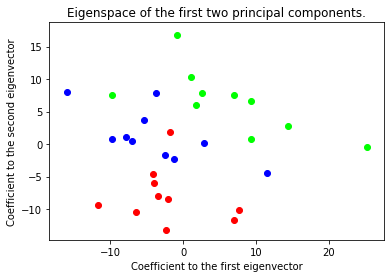

In [147]:

ColorCode = {
    1 : (1.0,0,0),
    2 : (0,1.0,0), 
    3 : (0,0,1.0), 
}
imgPCA = pca.transform(imgArr)
for i in range (len(imgPCA)):
    imgPCA1+=imgPCA[i][0]
    imgPCA2+=imgPCA[i][1]
imgPCA1 = np.asarray(imgPCA1)
imgPCA2 = np.asarray(imgPCA2)

for i in range(len(imgPCA)):
    plt.scatter(imgPCA1[i],imgPCA2[i],color = ColorCode[imgsLabel[i]])
plt.title("Eigenspace of the first two principal components.")
plt.xlabel("Coefficient to the first eigenvector"), plt.ylabel("Coefficient to the second eigenvector")
plt.show()


Part 4: Detect all the faces in the group image.

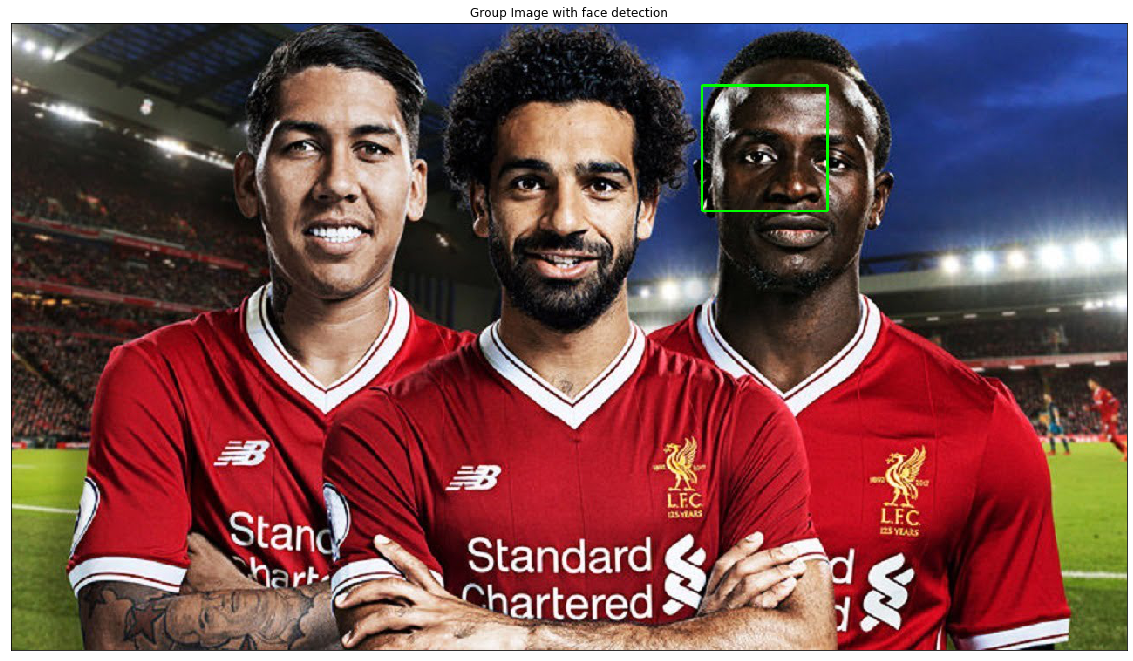

In [148]:
groupDetected = groupRGB.copy()
updated_groupDetected = groupDetected.copy()


class detectface():
    #initialize the attributes of the detectface class
    def __init__(self,x,y,w,h,label,idxX,idxY,faceIdx,distArr):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.label = label
        self.idxX = idxX
        self.idxY = idxY
        self.faceIdx = faceIdx
        self.distArr = distArr
                

#Design parameters for face detection
sliding_window = [80,80] 
pyramidSize = 1
scale =1.8
THRESHOLD = 8.5


minDist = []
faceArr = []
faceIdx = 0
for z in range(pyramidSize):
    sliding_window = [int(sliding_window[0] * scale),int(sliding_window[1] * scale)] 
    stepSize = int(min(sliding_window[0],sliding_window[1]) // 2)
    idxX=0
    idxY=0
    for y in range(0, group.shape[0], stepSize):
        idxX=0
        idxY+=1
        for x in range(0, group.shape[1], stepSize):
            idxX+=1
            
            
            window = groupGray[y:y + sliding_window[1], x:x + sliding_window[0]]
            if window.shape[0] != sliding_window[1] or window.shape[1] != sliding_window[0]:
                continue
            window = cv2.resize(window,(w,h))              
            
            #Get facespace images
            windowFace = toFaceSpace(window.reshape((w*h))[np.newaxis])
            eigenFacesTemp = imgsFaceSpace.copy()

            
            windowFace = np.array(windowFace)
            eigenFacesTemp = np.array(eigenFacesTemp)

            #compute SSD
            distances = Dist_Arr(windowFace.reshape((1,h,w)),eigenFacesTemp)
            
          
            #print a rectangle when the SSD is lower than the threshold
            if(min(distances) <= THRESHOLD):
                
                Face = detectface(x,y,sliding_window[0],sliding_window[1],imgsLabel[np.argmin(distances)],idxX,idxY,faceIdx,distances)
                faceIdx += 1
                faceArr.append(Face)
                
                
                cv2.rectangle(groupDetected, (x, y), (x + sliding_window[0], y + sliding_window[1]), (0, 1.0, 0), 2)
                cv2.waitKey(1)
            minDist.append(min(distances))
            


plt.figure(figsize=(20,20))
plt.imshow(groupDetected)
plt.title("Group Image with face detection"), plt.xticks([]), plt.yticks([])
plt.show()

I am only able to detect one face using my implementation. The reason is probably that the training images still have some notable occlusion due to changes in posture and head orientation. 

This method really only works after very carefully choosing training images. It does not work well when I introduce sources of error such as changes in orientation, lighting, background and image size.